# Convolutional Neural Networks in PyTorch

In this exercise, you will train a convolutional neural network in PyTorch on the CIFAR10 dataset. Try using all the hyperparameters you can think: architectures, number of hidden layers, layer size, dropout, regularization, batch size, optimizer, loss functions and more. Good luck!

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


PyTorch expects images in the format (num_channels, width, height) while plt expects images in a numpy array of shape (width, height, num_channels). `np.transpose` takes as input an array and list of axes, and moves the original axes according to the order that appears in the list. For example, calling `transpose` with some image in the format (c,w,h) and the list (1,2,0) will return the array in the format (w,h,c).

Image shape:  torch.Size([3, 32, 32])
      frog        car      plane      horse


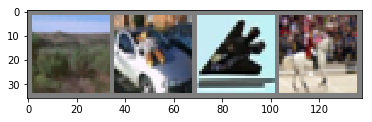

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # plt accepts images in the format (w,h,c)

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print("Image shape: ", images[0].shape)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(4)))

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #############################################################################
        # TO DO:                                                                    #
        # Define the basic architecture of your network. You can use any combination#
        # of layers.                                                                #
        # In this function, you should only define the layers you intend to use.    #
        # Save each layer as a different *self variable*.                           #
        # This function has no return value.                                        #
        #############################################################################
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5,120) #pool and conv changed shape
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################


    def forward(self, x):
        #############################################################################
        # TO DO:                                                                    #
        # Define the forward propagation of your network. Connect each layer to     #
        # the next and experiment with different activations, number of parameters  #
        # and depths. You can read about different activations in PyTorch at        #
        # https://pytorch.org/docs/stable/nn.html#non-linear-activation-functions   #
        # Return a single tensor after passing it through your network.             #
        # Hint: Shaping a multidimensional tensor into a vector can be achieved by: #
        # the method x.view()                                                       #
        #############################################################################
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
net = Net()


NameError: name 'nn' is not defined

In [1]:
#############################################################################
# TO DO:                                                                    #
# Pick a loss function and optimizer from your network. Start with a cross- #
# entropy loss and stochastic gradient descent with 0.001 learning rate and #
# test the effect of different learning rates and momentum.                 #
# Use the documentation and create variables to hold the loss function and  #
# optimizer. The model will take them as inputs for the training process    #
#############################################################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

NameError: name 'nn' is not defined

In [2]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

NameError: name 'trainloader' is not defined

GroundTruth:    cat  ship  ship plane


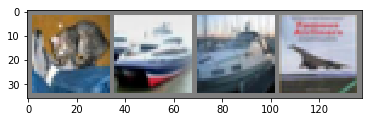

In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:      cat    ship    ship   plane
Predicted:        cat    ship    ship    ship


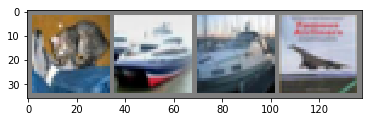

In [25]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%7s' % classes[labels[j]] for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join('%7s' % classes[predicted[j]]for j in range(4)))

In [30]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 62.32%


In [27]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}%'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 62.7%
car        - 77.2%
bird       - 37.3%
cat        - 44.2%
deer       - 53.8%
dog        - 50.6%
frog       - 71.0%
horse      - 74.3%
ship       - 77.6%
truck      - 74.5%


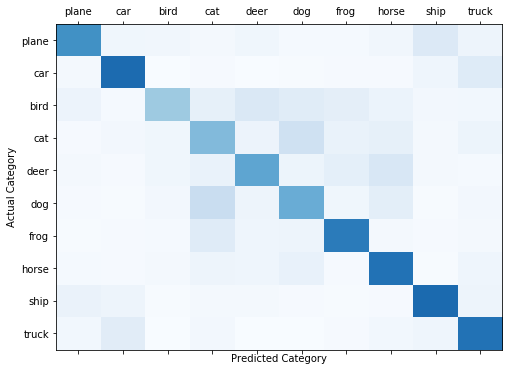

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()